In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 📌 Step 2: Load Titanic Dataset from Local File
df = pd.read_csv("Titanic-Dataset.csv")
print("First 5 rows:")
print(df.head())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [4]:
# 📌 Step 3: Basic Info
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

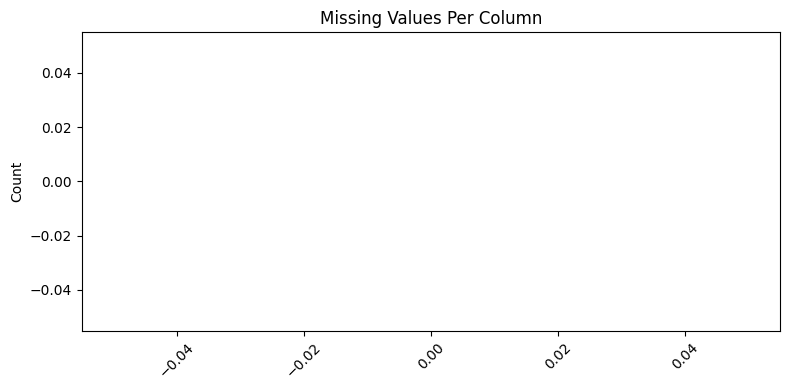

In [ ]:
# 📌 Step 4: Visualize Missing Data (Bar Plot)
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(8,4))
plt.bar(missing.index, missing.values, color='orange')
plt.title("Missing Values Per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# 📌 Step 5: Handle Missing Values
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# 📌 Step 6: Encode Categorical Variables
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


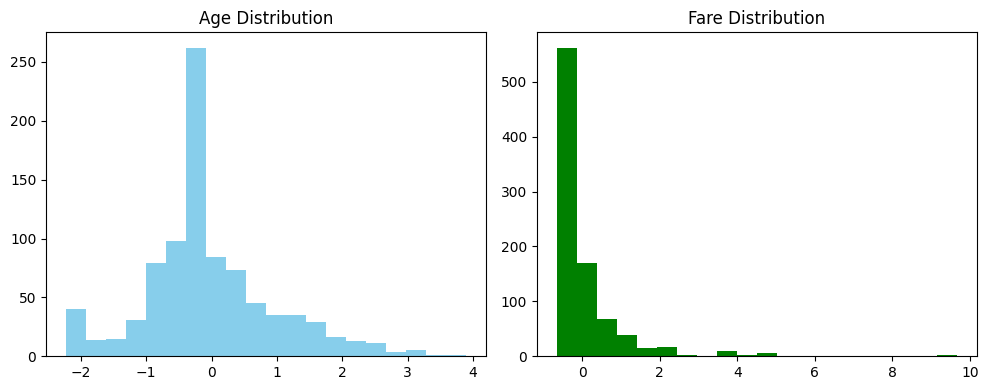

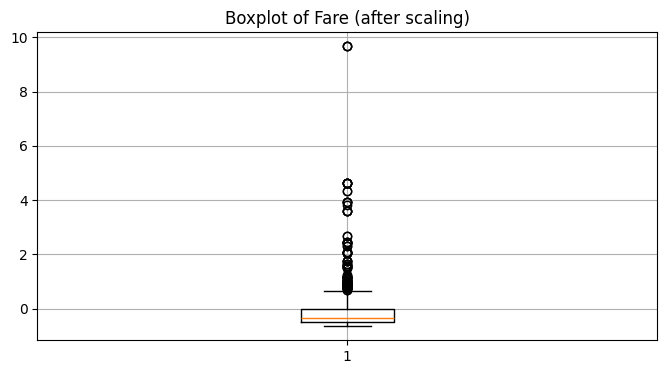

✅ Task Completed! Cleaned data saved as cleaned_titanic.csv


In [14]:
# 📌 Step 7: Visualize Age and Fare Before Scaling
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=20, color='green')
plt.title("Fare Distribution")
plt.tight_layout()
plt.show()

# 📌 Step 8: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# 📌 Step 9: Visualize Outliers (Boxplots)
plt.figure(figsize=(8,4))
plt.boxplot(df['Fare'])
plt.title("Boxplot of Fare (after scaling)")
plt.grid(True)
plt.show()

# 📌 Step 10: Remove Outliers using IQR (on numeric columns only)
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                  (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 📌 Step 11: Save the Cleaned Dataset
df_cleaned.to_csv("cleaned_titanic.csv", index=False)

print("✅ Task Completed! Cleaned data saved as cleaned_titanic.csv")